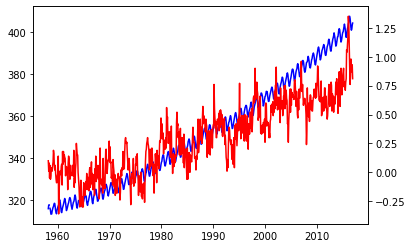

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
zip_demo= pd.read_pickle('zip_demo.p')
climate_change = pd.read_csv('climate_change.csv', index_col='date', parse_dates=['date'])


# Initalize a Figure and Axes
fig, ax= plt.subplots(1,1)

# Plot the CO2 variable in blue
ax.plot(climate_change.index, climate_change['co2'], color='blue')

# Create a twin Axes that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature in red
ax2.plot(climate_change.index, climate_change['relative_temp'], color='red')

plt.show()


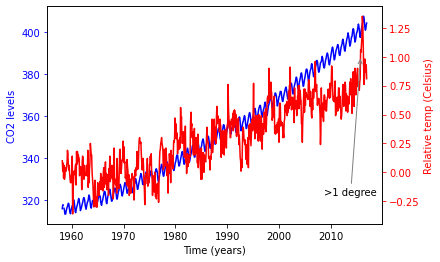

In [2]:
# Define a function called plot_timeseries
def plot_timeseries(axes, x, y, color, xlabel, ylabel):

  # Plot the inputs x,y in the provided color
  axes.plot(x, y, color=color)

  # Set the x-axis label
  axes.set_xlabel(xlabel)

  # Set the y-axis label
  axes.set_ylabel(ylabel, color=color)

  # Set the colors tick params for y-axis
  axes.tick_params('y', colors=color)
    
fig, ax = plt.subplots()

# Plot the CO2 levels time-series in blue
plot_timeseries(ax,climate_change.index, climate_change['co2'], 'blue', 'Time (years)', 'CO2 levels')

# Create an Axes object that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature data in red
plot_timeseries(ax2, climate_change.index, climate_change['relative_temp'], 'red', 'Time (years)', 'Relative temp (Celsius)')

# Annotate point with relative temperature >1 degree
ax2.annotate(">1 degree",xy=(pd.Timestamp('2015-10-06 00:00:00'), 1),xytext=(pd.Timestamp('2008-10-06 00:00:00'), -.2), arrowprops={'arrowstyle':'->', 'color':'gray'} )

plt.show()

               Bronze  Gold  Silver
United States      67   137      52


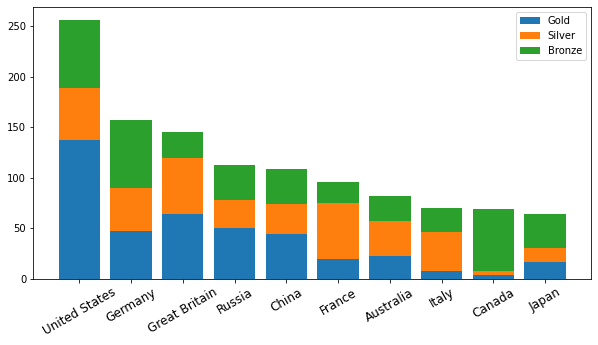

In [3]:
medals= pd.read_csv('medals_by_country_2016.csv', index_col=0)

print(medals.head(1))

fig, ax= plt.subplots()

## Setting the x labels and rotating the tick labels
#ax.set_xticklabels(medals.index, rotation= 90)

## Set the size of the figure
fig.set_size_inches([10,5])

# Add bars for "Gold" with the label "Gold"
ax.bar(medals.index, medals['Gold'], label='Gold')

# Stack bars for "Silver" on top with label "Silver"
ax.bar(medals.index, medals['Silver'], bottom= medals['Gold'], label='Silver')

# Stack bars for "Bronze" on top of that with label "Bronze"
ax.bar(medals.index, medals['Bronze'], bottom= medals['Gold']+ medals['Silver'], label= 'Bronze')

#This is to avoid the x labels of being cropped
#plt.tight_layout()
#fig.autolayout : True

plt.xticks(fontsize= 12, rotation=30)


# Display the legend
ax.legend()

# Save chart as image png jpg, etc and use bbox_inches to avoid getting the image cropped
fig.savefig('figure_10_5.png', bbox_inches = "tight")


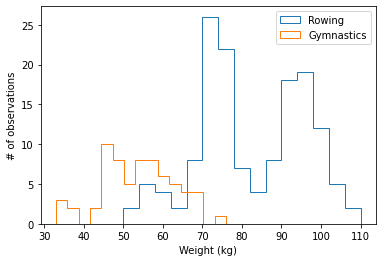

In [4]:
summer= pd.read_csv('summer2016.csv')

mens_rowing= summer[summer['Sport']=='Rowing']
mens_gymnastics= summer[summer['Sport']=='Gymnastics']


fig, ax = plt.subplots()

# Plot a histogram of "Weight" for mens_rowing
ax.hist(mens_rowing['Weight'], histtype= 'step', label='Rowing', bins=15)

# Compare to histogram of "Weight" for mens_gymnastics
ax.hist(mens_gymnastics['Weight'], histtype= 'step', label='Gymnastics', bins= 15)

ax.set_xlabel("Weight (kg)")
ax.set_ylabel("# of observations")

# Add the legend and show the Figure
ax.legend()
plt.show()


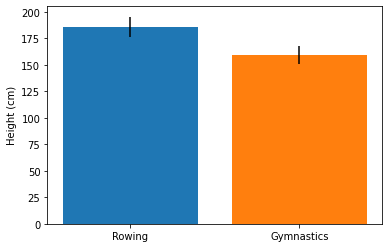

In [5]:
fig, ax = plt.subplots()

# Add a bar for the rowing "Height" column mean/std
ax.bar("Rowing", mens_rowing['Height'].mean(), yerr=mens_rowing['Height'].std())

# Add a bar for the gymnastics "Height" column mean/std
ax.bar("Gymnastics", mens_gymnastics['Height'].mean(), yerr=mens_gymnastics['Height'].std())

# Label the y-axis
ax.set_ylabel("Height (cm)")

plt.show()

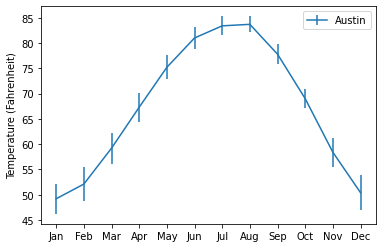

In [6]:
import calendar
seattle_weather= pd.read_csv('seattle_weather.csv')
austin_weather= pd.read_csv('austin_weather.csv')


fig, ax = plt.subplots()
import calendar

seattle_weather['MONTH'] = seattle_weather['DATE'].apply(lambda x: calendar.month_abbr[x])
austin_weather['MONTH'] = austin_weather['DATE'].apply(lambda x: calendar.month_abbr[x])

# Add Austin temperature data in each month with error bars
ax.errorbar(austin_weather['MONTH'], austin_weather["MLY-TAVG-NORMAL"], yerr=austin_weather["MLY-TAVG-STDDEV"], label='Austin') 

# Set the y-axis label
ax.set_ylabel("Temperature (Fahrenheit)")
ax.legend()

plt.show()



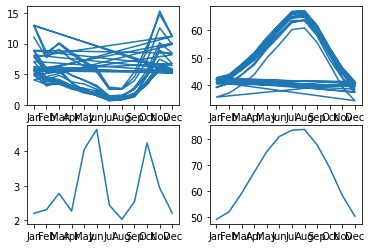

In [7]:

# Create a Figure and an array of subplots with 2 rows and 2 columns
fig, ax = plt.subplots(2, 2)

# Addressing the top left Axes as index 0, 0, plot month and Seattle precipitation
ax[0, 0].plot(seattle_weather["MONTH"], seattle_weather["MLY-PRCP-NORMAL"])

# In the top right (index 0,1), plot month and Seattle temperatures
ax[0, 1].plot(seattle_weather["MONTH"], seattle_weather["MLY-TAVG-NORMAL"])


# In the bottom left (1, 0) plot month and Austin precipitations
ax[1, 0].plot(austin_weather["MONTH"], austin_weather["MLY-PRCP-NORMAL"])

# In the bottom right (1, 1) plot month and Austin temperatures
ax[1, 1].plot(austin_weather["MONTH"], austin_weather["MLY-TAVG-NORMAL"])

plt.show()

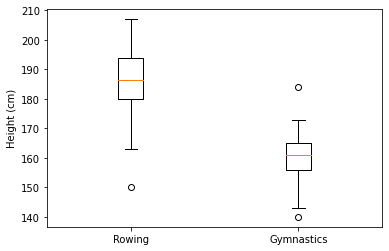

In [8]:
fig, ax = plt.subplots()

# Add a boxplot for the "Height" column in the DataFrames
ax.boxplot([mens_rowing['Height'], mens_gymnastics['Height']])

# Add x-axis tick labels:
ax.set_xticklabels(['Rowing', 'Gymnastics'])

# Add a y-axis label
ax.set_ylabel('Height (cm)')

plt.show()

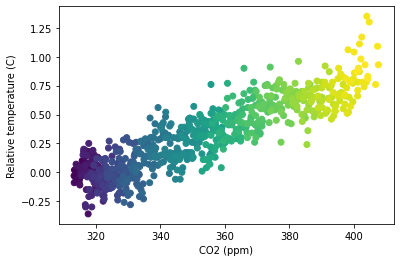

In [9]:
fig, ax = plt.subplots()

# Add data: "co2", "relative_temp" as x-y, index as color
ax.scatter(climate_change['co2'], climate_change['relative_temp'], c= climate_change.index)

# Set the x-axis label to "CO2 (ppm)"
ax.set_xlabel("CO2 (ppm)")

# Set the y-axis label to "Relative temperature (C)"
ax.set_ylabel("Relative temperature (C)")


plt.show()

Number of all countries: 193 

Number of all the drinking countries: 180 



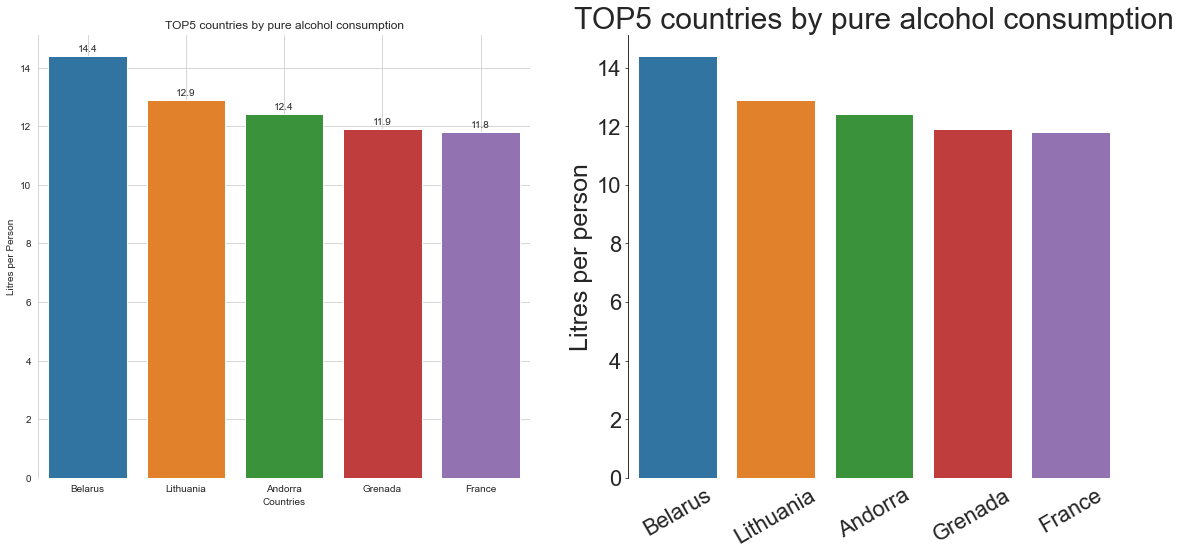

In [10]:
dft= pd.read_csv('drinks.csv')
print('Number of all countries:', len(dft), '\n')
df= dft[dft['total_litres_of_pure_alcohol']>0].reset_index(drop= True)

print('Number of all the drinking countries:', len(df), '\n')

top_5_drinking_countries= df.sort_values('total_litres_of_pure_alcohol', ascending= False)[:5].reset_index(drop= True)
fig, ax = plt.subplots(figsize=(16,7))
fig.tight_layout(pad=2)
sns.set_style('whitegrid')
plt.subplot(1,2,1, frameon= True)
ax = sns.barplot(x='country', y='total_litres_of_pure_alcohol', data= top_5_drinking_countries)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 7), textcoords='offset points')
plt.title('TOP5 countries by pure alcohol consumption')
plt.xlabel('Countries')
plt.ylabel('Litres per Person')
ax.grid(True)
plt.subplot(1,2,2, frameon= True)
sns.set_style('ticks')
ax = sns.barplot(x='country', y='total_litres_of_pure_alcohol', data= top_5_drinking_countries)
plt.title('TOP5 countries by pure alcohol consumption', fontsize=30)
plt.xlabel(None)
plt.xticks(fontsize=22, rotation=30)
plt.ylabel('Litres per person', fontsize=25)
plt.yticks(fontsize=22)
sns.despine(bottom=True)
ax.grid(False)
ax.tick_params(bottom=False, left=True)
for _,s in ax.spines.items():
    s.set_color('black')
plt.show()

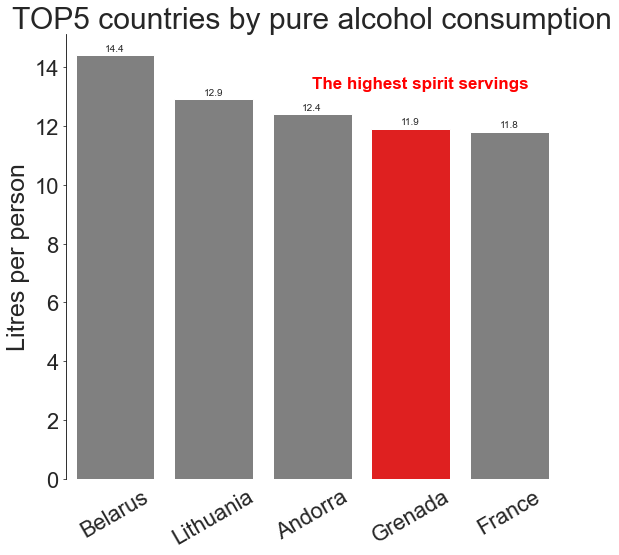

In [11]:
top_spirit= top_5_drinking_countries['spirit_servings']
colors= ['grey' if (p < max(top_spirit)) else 'red' for p in top_spirit]
fig, ax = plt.subplots(figsize=(16,7))
fig.tight_layout(pad=2)
sns.set_style('whitegrid')
plt.subplot(1,2,1, frameon= True)
ax = sns.barplot(x='country', y='total_litres_of_pure_alcohol', data= top_5_drinking_countries, palette= colors)
plt.title('TOP5 countries by pure alcohol consumption', fontsize=30)
plt.xlabel(None)
plt.xticks(fontsize=22, rotation=30)
plt.ylabel('Litres per person', fontsize=25)
plt.yticks(fontsize=22)
sns.despine(bottom=True)
ax.grid(False)
ax.tick_params(bottom=False, left=True)
ax.text(x=2., y=13.3, s='The highest spirit servings', color='red', size=17, weight='bold')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center',
    xytext=(0, 7), textcoords='offset points')
for _,s in ax.spines.items():
    s.set_color('black')
plt.show()

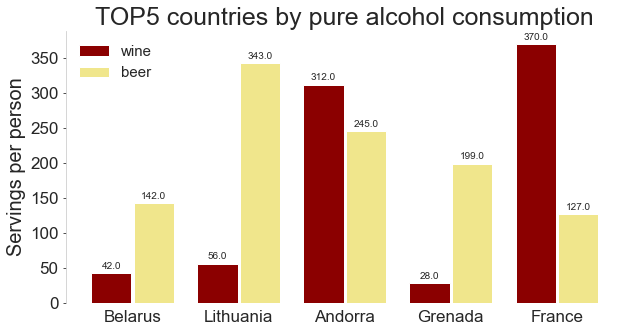

In [12]:
fig, ax = plt.subplots(figsize=(10,5))
x = np.arange(len(top_5_drinking_countries))
width = 0.38
plt.bar(x-0.2, top_5_drinking_countries['wine_servings'],
        width, color='darkred', label='wine')
plt.bar(x+0.2, top_5_drinking_countries['beer_servings'],
        width, color='khaki', label='beer')
plt.title('TOP5 countries by pure alcohol consumption', fontsize=25)
plt.xlabel(None)
plt.xticks(top_5_drinking_countries.index, top_5_drinking_countries['country'], fontsize=17)
plt.ylabel('Servings per person', fontsize=20)
plt.yticks(fontsize=17)
sns.despine(bottom=True)
ax.grid(False)
ax.tick_params(bottom=False, left=True)
plt.legend(frameon=False, fontsize=15)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center',
    xytext=(0, 7), textcoords='offset points')
plt.show()

In [13]:
#sns.countplot()
#sns.scatterplot()
#sns.relplot()
#sns.catplot()
#sns.boxplot()
student_data= pd.read_csv('student-alcohol-consumption.csv')
student_data= pd.DataFrame(data=student)
mpg= pd.read_csv('mpg.csv')
mpg= pd.DataFrame(data=mpg)
sns.catplot(data=student, x='study_time', y='absences', hue='location', kind='bar')
plt.ylabel('Absences', fontsize=20)
plt.xlabel('Study time', fontsize=20)
sns.relplot(data=mpg, x='horsepower', y='mpg', hue='cylinders', kind='scatter', size='cylinders', style='origin', aspect=2)
plt.ylabel('Miles per Galon', fontsize=20)
plt.xlabel('Horse power', fontsize=20)

## Use aspect to get the number of times of the width exmp. height=5  with an aspect of 2 the width= 2 times the hight 
## ci stands for the confidence interval of 95% while sd stands for standard deviation. 
## the lines show a 95% confidence interval the lewl of uncertainity we have about these estimates and assumes our data
## is a random sample where we can be 95% sure that the true population mean lies between the confindece intervals shown
sns.relplot(data=mpg, kind='line', x='model_year', y='mpg', ci='sd', height=5, aspect=2)
plt.ylabel('Miles per Galon', fontsize=20)
plt.xlabel('Model year', fontsize=20)
plt.show()

## The color box represents from the 25 to the 75 percintile while the line of the middle is the median.
## The whiskers tell us the spread of the distribution and the flowting points represent ouliers.
## You can remove the outliers by using sym='' or you can change the appearance of the outliers 
## The whiskers extend to 1.5 times the interquartile range (IQR(25 TO 75 percentile)) by deafult but this can be changed
## by using whis= 2.0 to change it to 2 times the IQR instead of 1.5 or whis=[5,95]to show from the 5 to the 95 percentile
study_time_order = ["<2 hours", "2 to 5 hours", "5 to 10 hours", ">10 hours"]
sns.catplot(data=student_data, x='study_time', y='G3', order=study_time_order, kind='box', aspect=2, sym='o')
plt.xticks(rotation=30, fontsize=20)

plt.show()

NameError: name 'student' is not defined

C:\Users\gdlmaand\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\gdlmaand\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


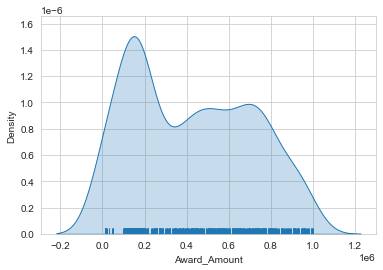

In [14]:
schooldf=pd.read_csv('2010 US School Improvement Grants.csv')

sns.distplot(schooldf['Award_Amount'],
             hist=False,
             rug=True,
             kde_kws={'shade':True})
plt.show()

C:\Users\gdlmaand\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


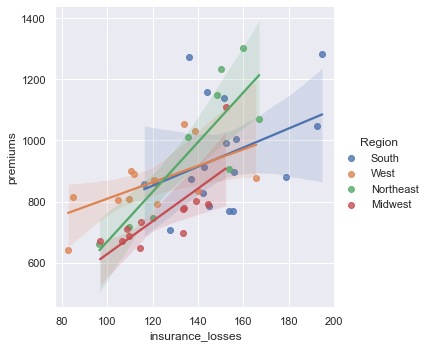

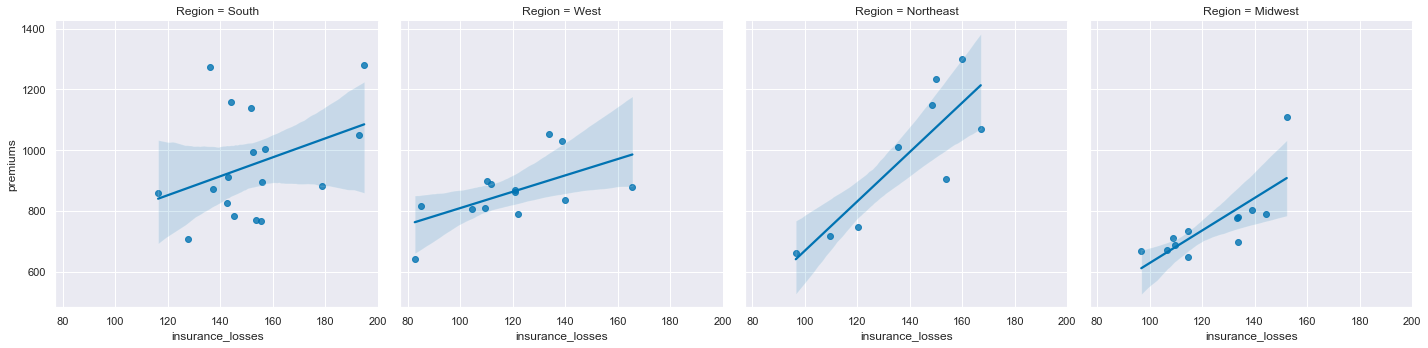

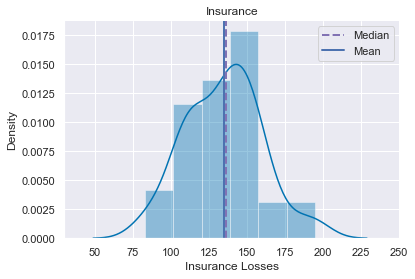

<Figure size 432x288 with 0 Axes>

In [15]:
#Set seaborn as the default style
sns.set(color_codes=True)

autodf= pd.read_csv('Automobile Insurance Premiums.csv')
sns.lmplot(data=autodf,
           x="insurance_losses",
           y="premiums",
           hue="Region")

#Set the colorblind palette
sns.set_palette('colorblind')
sns.lmplot(data=autodf,
           x="insurance_losses",
           y="premiums",
           col="Region")


# Create a figure and axes
fig, ax = plt.subplots()

mean= autodf['insurance_losses'].mean()
median= autodf['insurance_losses'].median()


sns.distplot(autodf['insurance_losses'], ax=ax)

# Modify the properties of the plot
ax.set(xlabel="Insurance Losses",
       xlim=(30,250),
       title="Insurance")

#Show lines in the mean and median values
ax.axvline(x=median, color='m', label='Median', linestyle='--', linewidth=2)
ax.axvline(x=mean, color='b', label='Mean', linestyle='-', linewidth=2)
# Remove the spines
sns.despine()

ax.legend()

# Show the plot and clear the figure
plt.show()
plt.clf()

C:\Users\gdlmaand\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\gdlmaand\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


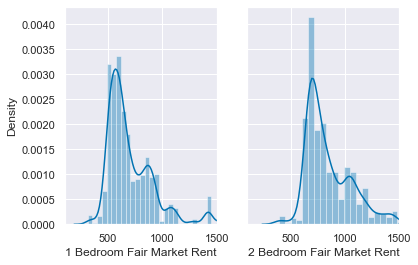

In [16]:
dfhous= pd.read_csv('US Housing and Urban Development FY 2018 Fair Market Rent.csv')
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=True)

# Plot the distribution of 1 bedroom apartments on ax0
sns.distplot(dfhous['fmr_1'], ax=ax0)
ax0.set(xlabel="1 Bedroom Fair Market Rent", xlim=(100,1500))

# Plot the distribution of 2 bedroom apartments on ax1
sns.distplot(dfhous['fmr_2'], ax=ax1)
ax1.set(xlabel="2 Bedroom Fair Market Rent", xlim=(100,1500))

# Display the plot
plt.show()

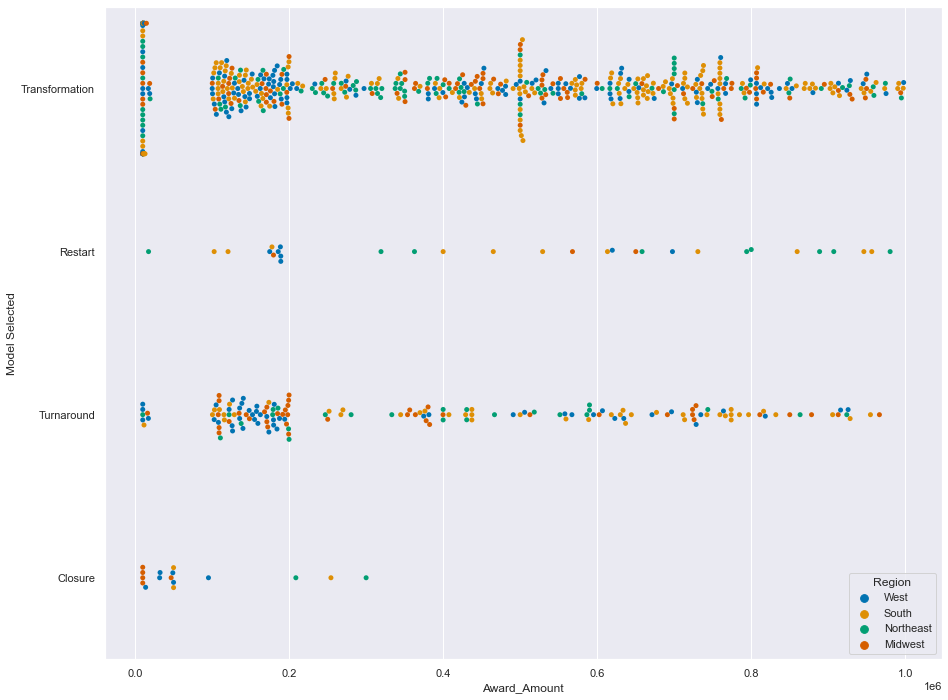

In [17]:
fig, ax= plt.subplots()
fig.set_size_inches([15,12])

dfsc=pd.read_csv('schoolimprovement2010grants.csv')
sns.swarmplot(data=dfsc,
         x='Award_Amount',
         y='Model Selected',
         hue='Region')


plt.show()

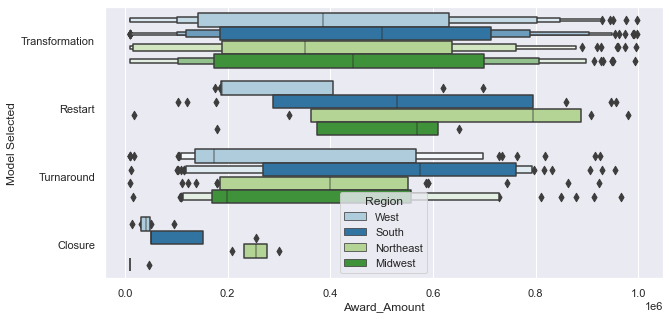

<Figure size 432x288 with 0 Axes>

In [18]:
fig, ax= plt.subplots()
fig.set_size_inches([10,5])
# Create a lvplot with the Paired palette and the Region column as the hue
sns.boxenplot(data=dfsc,
         x='Award_Amount',
         y='Model Selected',
         palette='Paired',
         hue='Region')

plt.show()
plt.clf()


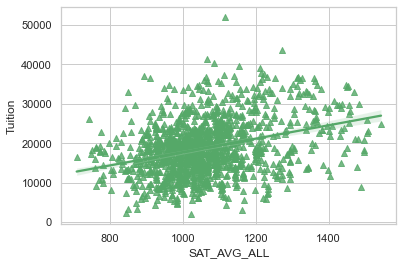

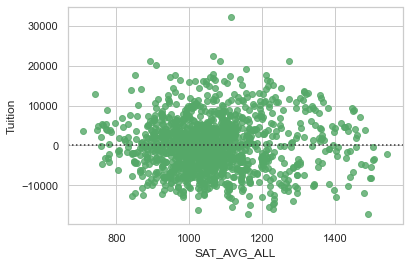

<Figure size 432x288 with 0 Axes>

In [19]:
dfcol= pd.read_csv('college_datav3.csv')
sns.set_style('whitegrid')


# Display a regression plot for Tuition
sns.regplot(data=dfcol,
         y='Tuition',
         x="SAT_AVG_ALL",
         marker='^',
         color='g')

plt.show()
plt.clf()


sns.residplot(data=dfcol,
          y='Tuition',
          x="SAT_AVG_ALL",
          color='g')

plt.show()
plt.clf()

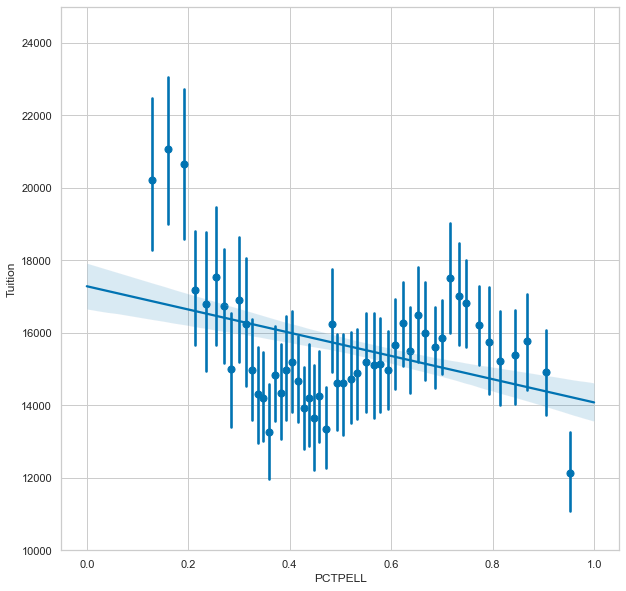

<Figure size 432x288 with 0 Axes>

In [20]:
fig, ax= plt.subplots()
fig.set_size_inches([10,10])
# Plot a regression plot of Tuition and the Percentage of Pell Grants
sns.regplot(data=dfcol, y='Tuition', x="PCTPELL", x_bins= 50, order=1, fit_reg=True)
ax.set(ylabel="Tuition", ylim=(10000,25000))


plt.show()
plt.clf()

In [23]:
# Create a crosstab table of the data
pd_crosstab = pd.crosstab(df["Group"], df["YEAR"])
print(pd_crosstab)

# Plot a heatmap of the table
sns.heatmap(pd_crosstab)

# Rotate tick marks for visibility
plt.yticks(rotation=0)
plt.xticks(rotation=90)

plt.show()

KeyError: 'Group'

In [24]:
## Importing hdf5 
import h5py 
import numpy as np
import pandas as pd
nsfg= "nsfg.hdf5"
nsfg= h5py.File(nsfg)
list(nsfg.keys())
df1= nsfg.get('nsfg')
print(list(df1.keys()))
nsfg= df1.get('block0_values')
nsfg= np.array(nsfg)
type(nsfg)
nsfg= pd.DataFrame(nsfg)
nsfg1k= df1.get('block0_items')
nsfg1k= np.array(nsfg1k)
print(nsfg1k)
nsfg= nsfg.rename(columns={0:'caseid', 1:'outcome', 2:'prglngth', 3:'agecon'})


nsfg1= df1.get('block1_values')
nsfg1= np.array(nsfg1)
type(nsfg1)
nsfg1= pd.DataFrame(nsfg1)
nsfg2k= df1.get('block1_items')
nsfg2k= np.array(nsfg2k)
print(nsfg2k)
nsfg1= nsfg1.rename(columns={0: 'birthwgt_lb1', 1:'birthwgt_oz1', 2:'nbrnaliv', 3:'agepreg', 4:'hpagelb', 5:'wgt2013_2015'})

nsfg = pd.merge(nsfg, nsfg1, left_index=True, right_index=True)
print(nsfg.shape)
print(nsfg.columns)
ounces= nsfg['birthwgt_oz1']
pounds= nsfg['birthwgt_lb1']
print(ounces.head())
#Count how many values per value and sort them
print(pounds.value_counts().sort_index())
#Summary statistics 
pounds.describe()
#Replace missing data with Nan using inplace to not create a copy and just change the original
pounds.replace([98, 99], np.nan, inplace= True)
ounces.replace([98, 99], np.nan, inplace= True)
birth_weight= pounds + (ounces/16)
birth_weight.describe()

['axis0', 'axis1', 'block0_items', 'block0_values', 'block1_items', 'block1_values']
[b'caseid' b'outcome' b'prglngth' b'agecon']
[b'birthwgt_lb1' b'birthwgt_oz1' b'nbrnaliv' b'agepreg' b'hpagelb'
 b'wgt2013_2015']
(9358, 10)
Index(['caseid', 'outcome', 'prglngth', 'agecon', 'birthwgt_lb1',
       'birthwgt_oz1', 'nbrnaliv', 'agepreg', 'hpagelb', 'wgt2013_2015'],
      dtype='object')
0     4.0
1    12.0
2     4.0
3     NaN
4    13.0
Name: birthwgt_oz1, dtype: float64
0.0        6
1.0       34
2.0       47
3.0       67
4.0      196
5.0      586
6.0     1666
7.0     2146
8.0     1168
9.0      363
10.0      82
11.0      17
12.0       7
13.0       2
14.0       2
17.0       1
98.0       1
99.0      94
Name: birthwgt_lb1, dtype: int64


count    6355.000000
mean        7.120978
std         1.422236
min         0.000000
25%         6.375000
50%         7.187500
75%         8.000000
max        17.937500
dtype: float64

1.0    6379
2.0     100
3.0       5
Name: nbrnaliv, dtype: int64
count    9109.000000
mean        0.552069
std         0.271479
min         0.000000
25%         0.250000
50%         0.670000
75%         0.750000
max         0.920000
dtype: float64


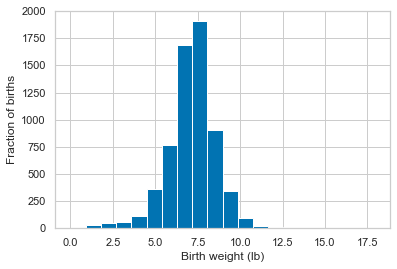

5.577598314606742
7.372323879231473


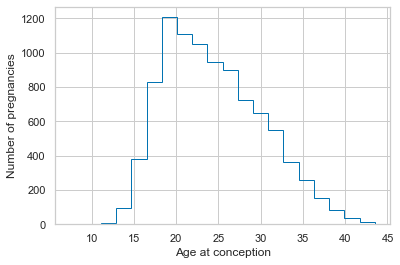

7.372323879231473
Single full-term mean: 7.385643450184502
Multiple full-term mean: 5.768055555555556


In [25]:
live = nsfg['outcome']==1
live.sum()
nsfg['nbrnaliv'].replace([8], np.nan, inplace= True)
print(nsfg['nbrnaliv'].value_counts())
agecon = nsfg['agecon']/100
agepreg = nsfg['agepreg']/100
preg_length = agepreg - agecon
print(preg_length.describe())
import matplotlib.pyplot as plt
plt.hist(birth_weight.dropna(),bins=20)
plt.xlabel('Birth weight (lb)')
plt.ylabel('Fraction of births')
plt.show()
preterm= nsfg['prglngth']<37
preterm.sum()
preterm_weight= birth_weight[preterm]
print(preterm_weight.mean())
fullterm_weight= birth_weight[~preterm]
print(fullterm_weight.mean())

# Plot the histogram
plt.hist(x=agecon, bins= 20, histtype='step')

# Label the axes
plt.xlabel('Age at conception')
plt.ylabel('Number of pregnancies')

# Show the figure
plt.show()

# Create a Boolean Series for full-term babies
full_term = nsfg['prglngth'] >= 37

# Select the weights of full-term babies
full_term_weight = birth_weight[full_term]

# Compute the mean weight of full-term babies
print(full_term_weight.mean())

# Filter single births
single = nsfg['nbrnaliv']== 1

# Compute birth weight for single full-term babies
single_full_term_weight = birth_weight[full_term & single]
print('Single full-term mean:', single_full_term_weight.mean())

# Compute birth weight for multiple full-term babies
mult_full_term_weight = birth_weight[~single & full_term]
print('Multiple full-term mean:', mult_full_term_weight.mean())

['axis0', 'axis1', 'block0_items', 'block0_values', 'block1_items', 'block1_values']
[b'age' b'cohort' b'educ' b'realinc' b'gunlaw' b'grass' b'wtssall']
[b'year' b'sex' b'race']


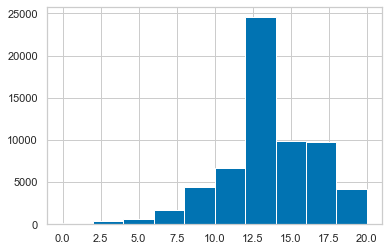

2867
18.0     350
19.0    1238
20.0    1128
21.0    1197
22.0    1261
        ... 
85.0     147
86.0     120
87.0     106
88.0      88
89.0     235
Name: age, Length: 72, dtype: int64


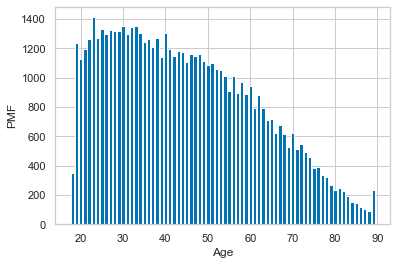

27.0


In [26]:
## Importing hdf5 
import h5py 
import numpy as np
import pandas as pd
from empiricaldist import Cdf
gss= "gss.hdf5"
gss= h5py.File(gss)
list(gss.keys())
df1= gss.get('gss')
print(list(df1.keys()))
gss= df1.get('block0_values')
gss= np.array(gss)
type(gss)
gss= pd.DataFrame(gss)
gss1k= df1.get('block0_items')
gss1k= np.array(gss1k)
print(gss1k)
gss= gss.rename(columns={0:'age', 1:'cohort', 2:'educ', 3:'realinc', 4: 'gunlaw', 5: 'grass', 6:'wtssall'})
gss1= df1.get('block1_values')
gss1= np.array(gss1)
type(gss1)
gss1= pd.DataFrame(gss1)
gss2k= df1.get('block1_items')
gss2k= np.array(gss2k)
print(gss2k)
gss1= gss1.rename(columns={0: 'year', 1:'sex', 2:'race'})
gss = pd.merge(gss, gss1, left_index=True, right_index=True)

educ= gss['educ']
plt.hist(educ.dropna(), label='educ')
plt.show()

pmf_year = gss.year.value_counts().sort_index()
print(pmf_year[2016])


age = gss['age']
#PMF WITH %=  pmf_age = (age.value_counts().sort_index())/len(age)
pmf_age = age.value_counts().sort_index()

print(pmf_age)
# Plot the PMF
plt.bar(data=pmf_age, x= pmf_age.index, height= pmf_age)
# Label the axes
plt.xlabel('Age')
plt.ylabel('PMF')
plt.show()

# Select the age column
age = gss['age']

# Compute the CDF of age
cdf_age = Cdf(age)

# Calculate the CDF of 30
print(cdf_age(30))

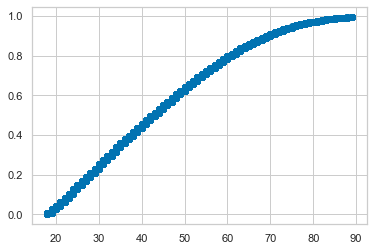

0.2531617199756668


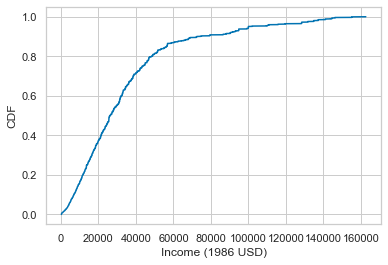

0.5308807991547402


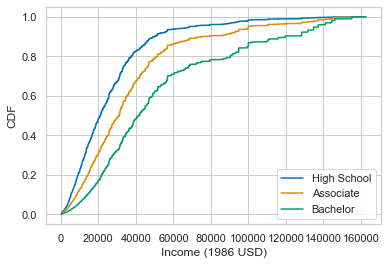

In [27]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

# Select the age column
age = gss['age']

# Compute the CDF of age
x, y = ecdf(age)

# Calculate the CDF of 30
plt.scatter(x, y)
plt.show()
dictionary = dict(zip(x, y))
print(dictionary[30])


# Select realinc
income = gss['realinc']

# Make the CDF
x, y = ecdf(income.dropna())

# Plot it
plt.plot(x, y)

# Label the axes
plt.xlabel('Income (1986 USD)')
plt.ylabel('CDF')
plt.show()

# Select educ
educ = gss['educ']

# Bachelor's degree
bach = (educ >= 16)

# Associate degree
assc = (educ >= 14) & (educ < 16)

# High school
high = (educ <= 12)
print(high.mean())

# Select realinc
income = gss['realinc']

# Make the CDF
x1, y1 = ecdf(income[high].dropna())
plt.plot(x1,y1, label= 'High School')
x2, y2 = ecdf(income[assc].dropna())
plt.plot(x2,y2, label= 'Associate')
x3, y3 = ecdf(income[bach].dropna())
plt.plot(x3,y3, label= 'Bachelor')
plt.xlabel('Income (1986 USD)')
plt.ylabel('CDF')
plt.legend()
plt.show()

4.371148677934171 0.4290082383271385


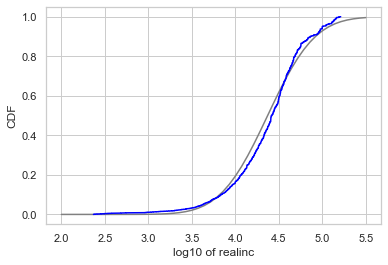

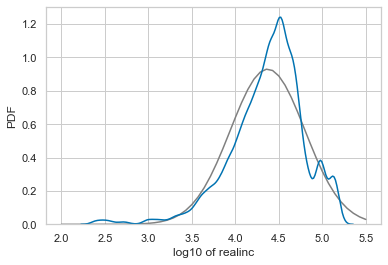

In [28]:
# Extract realinc and compute its log
income = gss['realinc']
log_income = np.log10(income)

# Compute mean and standard deviation
mean = log_income.mean()
std = log_income.std()
print(mean, std)

# Make a norm object
from scipy.stats import norm
dist = norm(mean, std)

# Evaluate the model CDF
xs = np.linspace(2, 5.5)
ys = dist.cdf(xs)

# Plot the model CDF
plt.clf()
plt.plot(xs, ys, color='gray')

# Create and plot the Cdf of log_income
xa, ya= ecdf(log_income.dropna())
plt.plot(xa, ya, color='blue')


# Label the axes
plt.xlabel('log10 of realinc')
plt.ylabel('CDF')
plt.show()


import seaborn as sns
# Evaluate the normal PDF
xs = np.linspace(2, 5.5)
ys = dist.pdf(xs)

# Plot the model PDF
plt.clf()
plt.plot(xs, ys, color='gray')

# Plot the data KDE
sns.kdeplot(log_income)
    
# Label the axes
plt.xlabel('log10 of realinc')
plt.ylabel('PDF')
plt.show()

['axis0', 'axis1', 'block0_items', 'block0_values']
[b'SEX' b'HTM4' b'WTKG3' b'INCOME2' b'_LLCPWT' b'_AGEG5YR' b'_VEGESU1'
 b'_HTMG10' b'AGE']


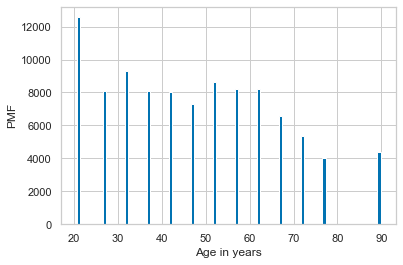

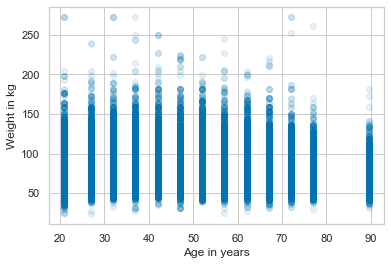

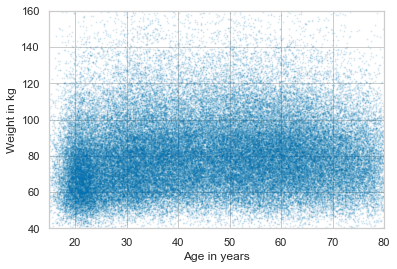

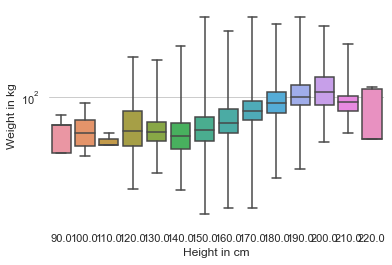

In [29]:
## Importing hdf5 
import h5py 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from empiricaldist import Cdf
import seaborn as sns
brfss= "brfss.hdf5"
brfss= h5py.File(brfss)
list(brfss.keys())
df1= brfss.get('brfss')
print(list(df1.keys()))
brfss= df1.get('block0_values')
brfss= np.array(brfss)
type(brfss)
brfss= pd.DataFrame(brfss)
brfss1k= df1.get('block0_items')
brfss1k= np.array(brfss1k)
print(brfss1k)
brfss= brfss.rename(columns={0:'SEX', 1:'HTM4', 2:'WTKG3', 3:'INCOME2', 4: '_LLCPWT', 5: '_AGEG5YR', 6:'_VEGESU1', 7:'_HTMG10', 8:'AGE'})


# Extract age
age = brfss['AGE']

# Plot the PMF
pmf_age = age.value_counts().sort_index()
plt.bar(data=pmf_age, x=pmf_age.index, height=pmf_age)

# Label the axes
plt.xlabel('Age in years')
plt.ylabel('PMF')
plt.show()


# Select the first 1000 respondents
# brfss = brfss[:1000]

# Extract age and weight
age = brfss['AGE']
weight = brfss['WTKG3']

# Make a scatter plot

plt.plot(age, weight, 'o', alpha=0.1)
plt.xlabel('Age in years')
plt.ylabel('Weight in kg')

plt.show()

# Add jittering to age
age = brfss['AGE'] + np.random.normal(0, 2.5, size= len(brfss))
# Extract weight
weight = brfss['WTKG3']+ np.random.normal(0, 2.5, size= len(brfss))

# Make a scatter plot

plt.plot(age, weight, 'o', markersize=1, alpha=.1)
plt.xlabel('Age in years')
plt.ylabel('Weight in kg')
plt.axis([15,80, 40, 160])
plt.show()


# Drop rows with missing data
data = brfss.dropna(subset=['_HTMG10', 'WTKG3'])

# Make a box plot
sns.boxplot(data= data, x='_HTMG10', y='WTKG3', whis=10)

# Plot the y-axis on a log scale
plt.yscale('log')


# Remove unneeded lines and label axes
sns.despine(left=True, bottom=True)
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show()



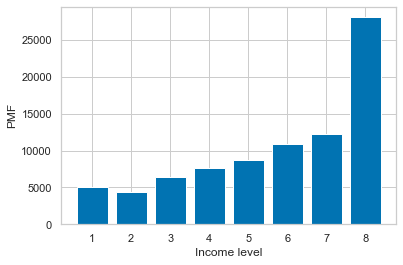

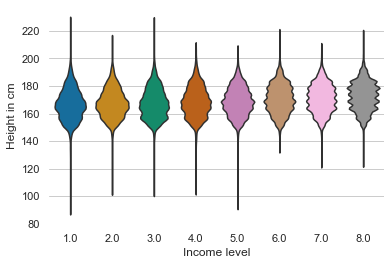

               AGE   INCOME2  _VEGESU1
AGE       1.000000 -0.015158 -0.009834
INCOME2  -0.015158  1.000000  0.119670
_VEGESU1 -0.009834  0.119670  1.000000


In [30]:
# Extract income
income = brfss['INCOME2']

# Plot the PMF
value= income.value_counts().sort_index()
plt.bar(data=value, x= value.index, height= value)


# Label the axes
plt.xlabel('Income level')
plt.ylabel('PMF')
plt.show()

# Make a violin plot
sns.violinplot(x='INCOME2', y='HTM4', data=data, inner= None)


# Remove unneeded lines and label axes
sns.despine(left=True, bottom=True)
plt.xlabel('Income level')
plt.ylabel('Height in cm')
plt.show()


# Select columns
columns = ['AGE', 'INCOME2', '_VEGESU1']
subset = brfss[columns]

# Compute the correlation matrix
print(subset.corr())

LinregressResult(slope=0.9192115381848303, intercept=-75.12704250330242, rvalue=0.47420308979024656, pvalue=0.0, stderr=0.0056328637698029906, intercept_stderr=0.9608860265433169)


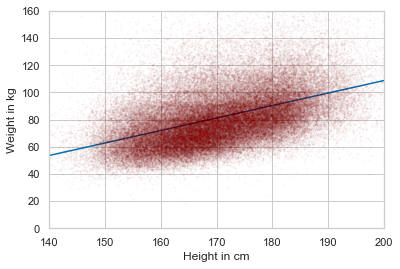

In [32]:
from scipy.stats import linregress

#Plot a linear regression 
subset= brfss.dropna(subset=['HTM4', 'WTKG3'])
xs= subset['HTM4']
ys= subset['WTKG3']
res= linregress(xs, ys)
fx= np.array([xs.min(), ys.max()])
fy= res.intercept + res.slope * fx
plt.plot(fx, fy, '-')
print(res)

# Make a scatter plot
xs= subset['HTM4'] + np.random.normal(0,2.5, size= len(xs))
ys= subset['WTKG3'] + np.random.normal(0,2.5, size= len(xs))
plt.plot(xs, ys, 'o', markersize=1, alpha=.03, color= 'darkred')
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.axis([140,200, 0, 160])
plt.show()

In [33]:
import statsmodels.formula.api as smf

#Ordinary least squares 

results= smf.ols('INCOME2 ~ _VEGESU1', data= brfss).fit()
results.params
res1= brfss.dropna(subset=['INCOME2', '_VEGESU1'])
xs1= res1['INCOME2']
ys1= res1['_VEGESU1']
res1= linregress(xs1, ys1)
display(res1)
display(results.params)

results= smf.ols('realinc ~ educ + age', data= gss).fit()
results.params


LinregressResult(slope=0.0698804809210502, intercept=1.5287786243363106, rvalue=0.11967005884864103, pvalue=1.3785039162482425e-238, stderr=0.0021109763563323335, intercept_stderr=0.013196467544093609)

Intercept    5.450700
_VEGESU1     0.204935
dtype: float64

Intercept   -16117.275684
educ          3655.166921
age             83.731804
dtype: float64

Intercept   -23241.884034
educ          -528.309369
educ2          159.966740
age           1696.717149
age2           -17.196984
dtype: float64


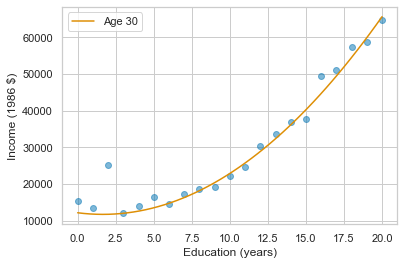

In [34]:
# Add a new column with educ squared
gss['educ2'] = gss['educ']**2
gss['age2'] = gss['age']**2


# Run a regression model with educ, educ2, age, and age2
results = smf.ols('realinc ~ educ + educ2 + age + age2', data=gss).fit()

# Print the estimated parameters
print(results.params)

# Make the DataFrame
df = pd.DataFrame()
df['educ'] = np.linspace(0, 20)
df['age'] = 30
df['educ2'] = df['educ']**2
df['age2'] = df['age']**2

# Plot mean income in each age group
plt.clf()
grouped = gss.groupby('educ')
mean_income_by_educ = grouped['realinc'].mean()
plt.plot(mean_income_by_educ, 'o', alpha=0.5)

# Plot the predictions
pred = results.predict(df)
plt.plot(df['educ'], pred, label='Age 30')


# Label axes
plt.xlabel('Education (years)')
plt.ylabel('Income (1986 $)')
plt.legend()
plt.show()


## I think the DF is necessary 

Optimization terminated successfully.
         Current function value: 0.588510
         Iterations 6
Intercept     -1.685223
C(sex)[T.2]   -0.384611
age           -0.034756
age2           0.000192
educ           0.221860
educ2         -0.004163
dtype: float64


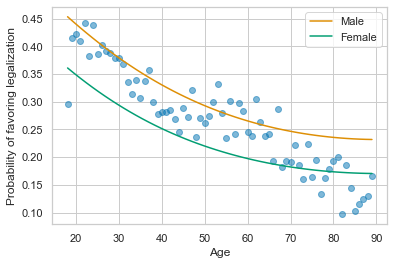

In [35]:
# Recode grass
gss['grass'].replace(2, 0, inplace=True)

# Run logistic regression  C() is for categorical variables
results = smf.logit('grass ~ age + age2 + educ + educ2 + C(sex)', data=gss).fit()
print(results.params)

# Make a DataFrame with a range of ages
df = pd.DataFrame()
df['age'] = np.linspace(18, 89)
df['age2'] = df['age']**2

# Set the education level to 12
df['educ'] = 12
df['educ2'] = df['educ']**2

# Generate predictions for men and women
df['sex'] = 1
pred1 = results.predict(df)

df['sex'] = 2
pred2 = results.predict(df)

plt.clf()
grouped = gss.groupby('age')
favor_by_age = grouped['grass'].mean()
plt.plot(favor_by_age, 'o', alpha=0.5)

plt.plot(df['age'], pred1, label='Male')
plt.plot(df['age'], pred2, label='Female')

plt.xlabel('Age')
plt.ylabel('Probability of favoring legalization')
plt.legend()
plt.show()